In [ ]:
import os
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scprep
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import shortest_path, connected_components

In [ ]:
import phate
from sklearn.manifold import TSNE
from scipy.sparse.csgraph import connected_components
import networkx as nx
from matplotlib.patches import Patch

In [ ]:
import helpers

In [ ]:
merged_metadata, relatedness, genotypes_array, mapping_info = helpers.load_data()

# Step 0: Pre-process data
normalized_matrix, overlap_counts = helpers.preprocess_data_matrix(genotypes_array)

# Fit PCA model on unrelated samples
filters = ["filter_pca_outlier", "hard_filtered", "filter_contaminated"]
_filtered_indices = merged_metadata[merged_metadata[filters].any(axis=1)].index
filtered_indices = ~merged_metadata.index.isin(_filtered_indices)
related_indices = ~merged_metadata['filter_king_related'].values #np.ones(shape=genotypes_array.shape[0], dtype=bool)

to_fit_on = related_indices & filtered_indices
to_transform_on = (~related_indices) & filtered_indices

pca_emb, _ = helpers.compute_pca_from_hail('/lustre06/project/6065672/shared/MattDataSharing/1KGP+HGDP/V4/pca_scores_hailcomputed.csv', 
                                            merged_metadata, 
                                            50)

In [ ]:
import graphtools

graph2 = graphtools.Graph(pca_emb[to_fit_on],
n_pca=None,
n_landmark=None,
distance='euclidean',
precomputed=None,
knn=5,
knn_max=None,
decay=40,
thresh=1e-4,
n_jobs=8,
verbose=False,
random_state=42
)

knn_graph = graph2.knn_tree.kneighbors_graph()

In [ ]:
knn_graph.K

In [ ]:
# sanity check
knn_max = graph2.knn_max + 1 if graph2.knn_max else None
K = graph2.build_kernel_to_data(graph3.data_nu, knn=graph2.knn + 1, knn_max=knn_max)
K2 = graph2.symmetrize_kernel(K)

In [ ]:
K2 # same?

In [22]:
def plot_graph(A, indices=to_fit_on):
    graph = nx.from_numpy_array(A)

    cmap = helpers.make_palette_label_order_HGDP(merged_metadata)

    for i, node in enumerate(graph.nodes()):
        graph.nodes[node]['population'] = merged_metadata['Population'][indices].iloc[i]
        graph.nodes[node]['region'] = merged_metadata['Genetic_region_merged'][indices].iloc[i]
        graph.nodes[node]['sample_id'] = merged_metadata[indices].index[i]

    print(nx.is_connected(graph))

    # Get connected components as a list of sets
    connected_components = list(nx.connected_components(graph))

    # Create a mapping of sample IDs to their connected component index
    component_mapping = {}
    for component_index, component_nodes in enumerate(connected_components):
        for node in component_nodes:
            sample_id = graph.nodes[node]['sample_id']
            component_mapping[sample_id] = component_index

    # Convert the mapping to a DataFrame
    component_df = pd.DataFrame.from_dict(component_mapping, orient='index', columns=['Connected_Component'])
    component_df.index.name = 'Sample_ID'

    # Reset index for easier use
    component_df = component_df.reset_index()
    
    # print statistics
    #unique_categories = np.unique(component_df['Connected_Component'])
    #palette = sns.color_palette("husl", len(unique_categories))  # Use HUSL for distinct colors
    #cmap = {category: color for category, color in zip(unique_categories, palette)}

    print(np.unique(component_df['Connected_Component'], return_counts=True))

    #node_colors = [cmap[1][k] for k in merged_metadata[to_fit_on].loc[component_df['Sample_ID']]['Population']]
    node_colors = [cmap[1][graph.nodes[node]['population']] for node in graph.nodes()]
    #node_colors = [cmap[1][k] for k in merged_metadata[to_fit_on]['Population']]

    # Now plot the graph
    fig, ax = plt.subplots(figsize=(10, 8))
    nx.draw(graph, node_color=node_colors, ax=ax, pos=nx.spring_layout(graph))

    # Create legend manually
    legend_elements = [Patch(facecolor=cmap[0][tgt_name], 
                             edgecolor='k', label=str(tgt_name)) for tgt_name in cmap[0].keys()]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.1, 1.05), loc='upper left')

    plt.show()

False
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([880, 123, 567, 405, 586, 219,  16,  21,  10,  22,  17, 125,  10,
        27, 130,  24,  10,  25,  17, 100,  66]))


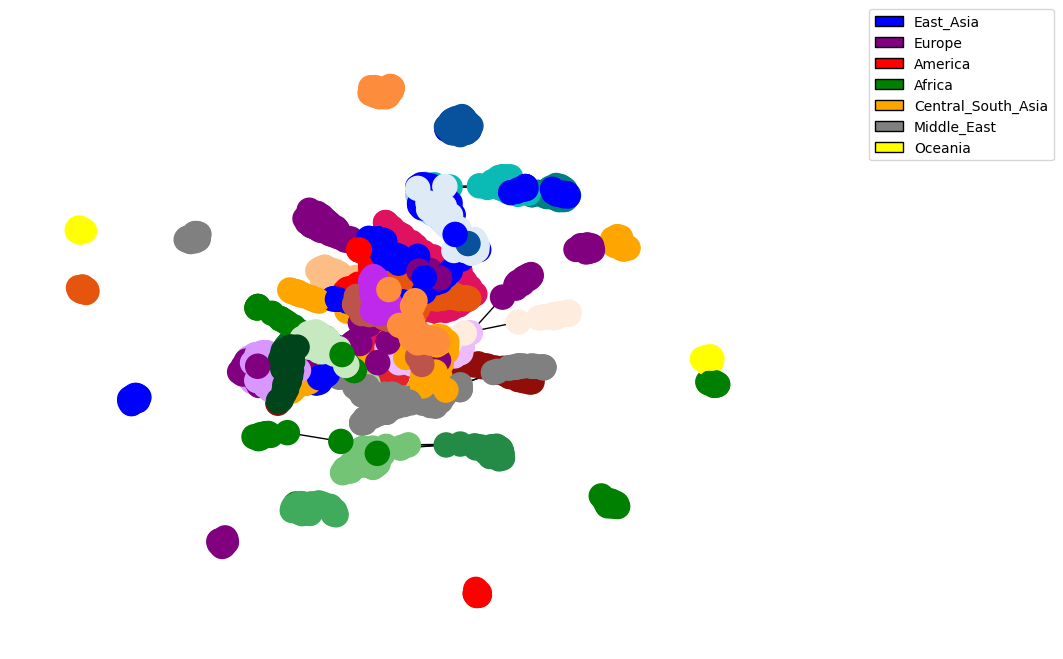

In [8]:
plot_graph(knn_graph.todense())

False
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([1014,  559,  618,  652,   16,   21,   10,   22,   17,  125,   10,
         27,  130,   24,    6,    6,   10,   25,    8,  100]))


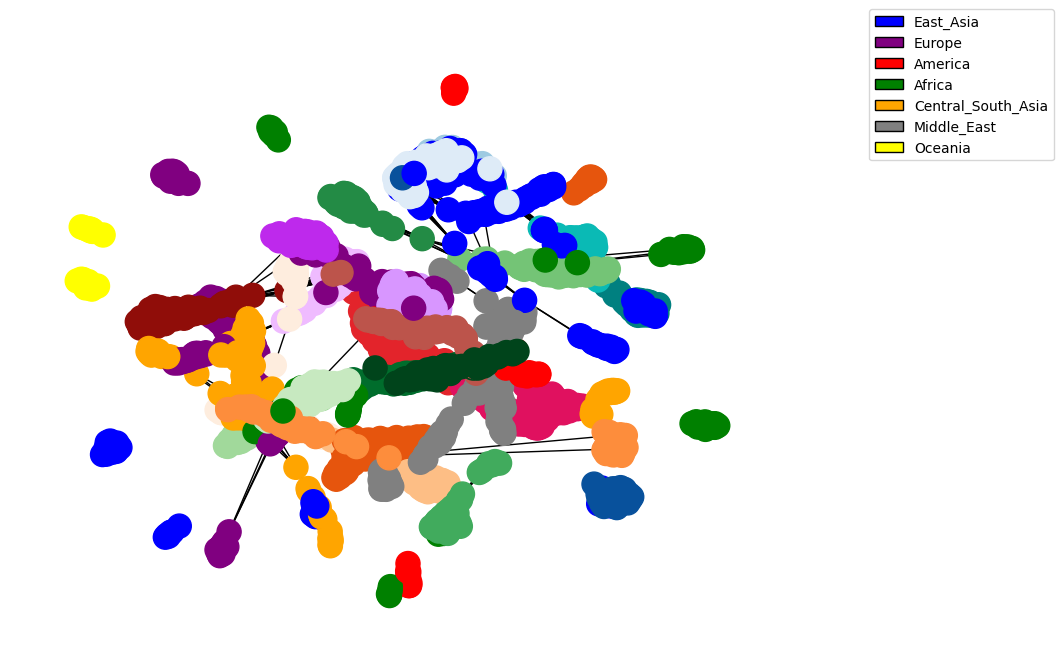

In [9]:
plot_graph(graph2.K.todense() - np.eye(graph2.K.shape[0]))

In [10]:
print('test')

test


In [71]:
to_fit_on2 = (merged_metadata["Project"] == '1KGP') & to_fit_on

In [72]:
graph3 = graphtools.Graph(pca_emb[to_fit_on2],
n_pca=None,
n_landmark=None,
distance='euclidean',
precomputed=None,
knn=5,
knn_max=None,
decay=40,
thresh=1e-20,
n_jobs=8,
verbose=False,
random_state=42
)

In [86]:
graph3.K

<2520x2520 sparse matrix of type '<class 'numpy.float64'>'
	with 59882 stored elements in Compressed Sparse Row format>

In [ ]:
knn_graph2 = graph3.knn_tree.kneighbors_graph()

In [87]:
K

<2520x2520 sparse matrix of type '<class 'numpy.float64'>'
	with 41328 stored elements in Compressed Sparse Row format>

In [89]:
K2

<2520x2520 sparse matrix of type '<class 'numpy.float64'>'
	with 59882 stored elements in Compressed Sparse Row format>

False
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([209,  98, 398, 551, 370, 422, 199,  16, 101,  90,  66]))


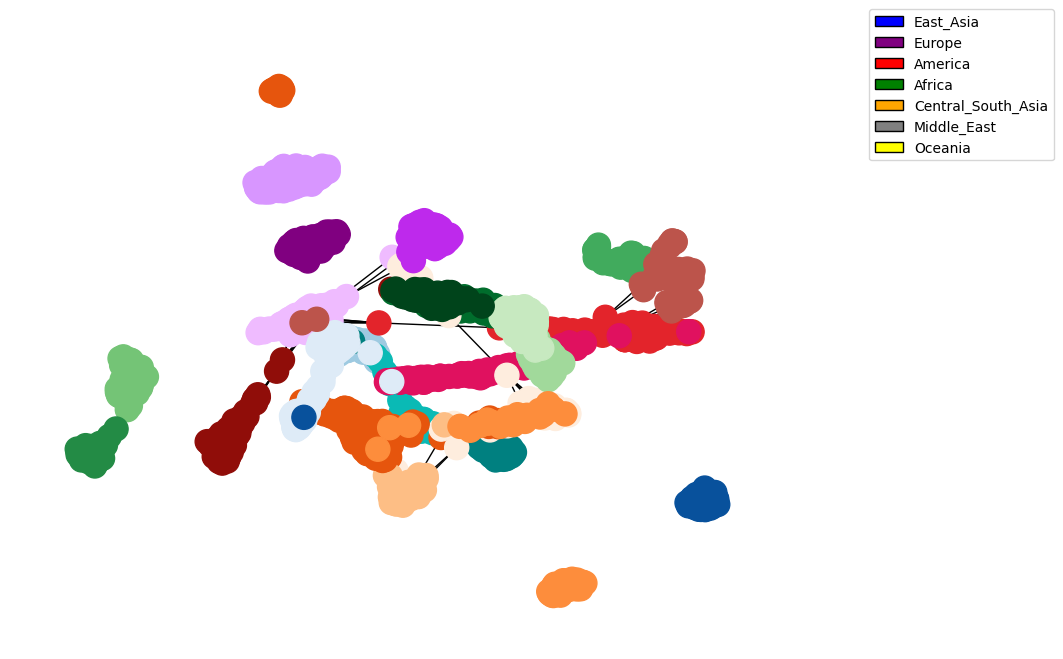

In [36]:
plot_graph(knn_graph2.todense(), indices=to_fit_on2)

False
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([209,  98, 398, 551, 569, 488,  16, 101,  90]))


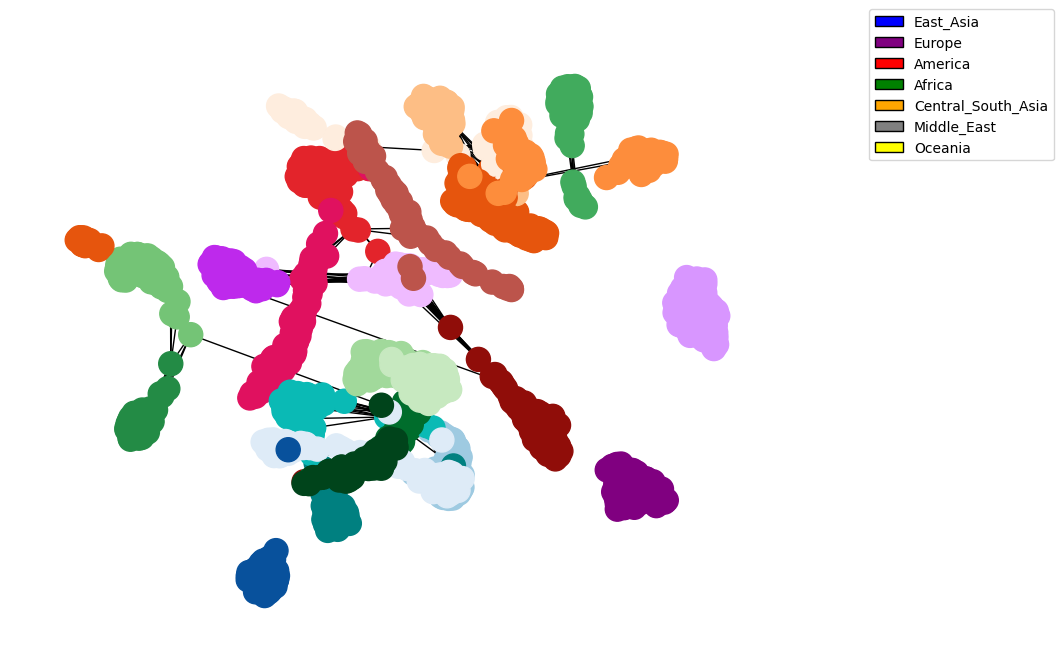

In [37]:
plot_graph(graph3.K.todense() - np.eye(graph3.K.shape[0]), indices=to_fit_on2)

In [55]:
adj1 = knn_graph2.todense() # from KNN graph
adj2 = graph3.K.todense() - np.eye(graph3.K.shape[0]) # from kernel matrix

In [56]:
adj1_bool = (adj1 == 0)
adj2_bool = (adj2 == 0)

In [57]:
(adj1_bool & ~adj2_bool).sum()

42255

In [58]:
(~adj1_bool & adj2_bool).sum()

13

In [63]:
(adj1_bool & adj2_bool).sum()

6293025

In [53]:
adj1[(~adj1_bool & adj2_bool)]

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1.]])

In [50]:
adj2_bool

matrix([[ True, False,  True, ...,  True,  True,  True],
        [False,  True, False, ...,  True,  True,  True],
        [ True, False,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])

matrix([[ True, False,  True, ...,  True,  True,  True],
        [False,  True, False, ...,  True,  True,  True],
        [ True, False,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False,  True,  True]])

In [64]:
graph_ad1 = nx.from_numpy_array(adj1)
graph_ad2 = nx.from_numpy_array(adj2)

In [70]:
connected_components_ad1 = list(nx.connected_components(graph_ad1))
connected_components_ad2 = list(nx.connected_components(graph_ad2))

print([len(k) for k in connected_components_ad1])
print([len(k) for k in connected_components_ad2])

[209, 98, 398, 551, 370, 422, 199, 16, 101, 90, 66]
[1329, 98, 398, 488, 16, 101, 90]
